# World Happiness Report

## Introduction

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

In the reports, experts in fields including economics, psychology, survey analysis, and national statistics, describe how measurements of well-being can be used effectively to assess the progress of nations, and other topics. Each report is organized by chapters that delve deeper into issues relating to happiness, including mental illness, the objective benefits of happiness, the importance of ethics, policy implications, and links with the Organisation for Economic Co-operation and Development's (OECD) approach to measuring subjective well-being and other international and national efforts.

## Import libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## Data overview

### 1. Preparing the dataframe

In [145]:
# READING CSV FILES

current_path = os.getcwd()
csv_list_files = os.listdir(current_path + "/data")

# list of dataframes
df_dict = {} 

for csv_file in  csv_list_files:
    year = int(csv_file.split('.csv')[0])
    df_year = pd.read_csv("data/" + csv_file)
    df_year['Year'] = year
    df_dict[str(year)] = df_year
    print("World Happiness Report - Year: {}, Data size: {}".format(year, df_year.shape[0]))
    print("Columns names: {}\n".format(list(df_year.columns)))   

World Happiness Report - Year: 2015, Data size: 158
Columns names: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']

World Happiness Report - Year: 2016, Data size: 157
Columns names: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']

World Happiness Report - Year: 2017, Data size: 155
Columns names: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year']

World Happiness Report - Year: 2018, Data size: 156
Columns nam

We notice that DataFrames do not share same column names.

In [146]:
list(df_dict['2018']['Country or region'].unique())

['Finland',
 'Norway',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Canada',
 'New Zealand',
 'Sweden',
 'Australia',
 'United Kingdom',
 'Austria',
 'Costa Rica',
 'Ireland',
 'Germany',
 'Belgium',
 'Luxembourg',
 'United States',
 'Israel',
 'United Arab Emirates',
 'Czech Republic',
 'Malta',
 'France',
 'Mexico',
 'Chile',
 'Taiwan',
 'Panama',
 'Brazil',
 'Argentina',
 'Guatemala',
 'Uruguay',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Malaysia',
 'Spain',
 'Colombia',
 'Trinidad & Tobago',
 'Slovakia',
 'El Salvador',
 'Nicaragua',
 'Poland',
 'Bahrain',
 'Uzbekistan',
 'Kuwait',
 'Thailand',
 'Italy',
 'Ecuador',
 'Belize',
 'Lithuania',
 'Slovenia',
 'Romania',
 'Latvia',
 'Japan',
 'Mauritius',
 'Jamaica',
 'South Korea',
 'Northern Cyprus',
 'Russia',
 'Kazakhstan',
 'Cyprus',
 'Bolivia',
 'Estonia',
 'Paraguay',
 'Peru',
 'Kosovo',
 'Moldova',
 'Turkmenistan',
 'Hungary',
 'Libya',
 'Philippines',
 'Honduras',
 'Belarus',
 'Turkey',
 'Pakistan',
 'Hong Kong',
 

Except for countries like Congo which is splitted into cities, the entered values are countries. The column 'Country or region' can be renamed to 'Country'.

Same observation for '2019'.

The Dataframe list do not share the same list of countries.

In [147]:
df_dict['2015']['Family'].describe()

count    158.000000
mean       0.991046
std        0.272369
min        0.000000
25%        0.856823
50%        1.029510
75%        1.214405
max        1.402230
Name: Family, dtype: float64

In [148]:
df_dict['2018']['Social support'].describe()

count    156.000000
mean       1.213237
std        0.302372
min        0.000000
25%        1.066750
50%        1.255000
75%        1.463000
max        1.644000
Name: Social support, dtype: float64

Having the support of the family is having a social support. Consequently, the 'Family' feature is included in 'Social support'. However, it is important to remember that from 2018, more people might have been included (such as friends) or close friends were already part of 'Family'.

In [149]:
# PREPARING THE DATA

# Columns kept: 'Country', 'Happiness Rank', 'Happiness Score','Standard Error',
#               'Economy (GDP per Capita)', 'Social support', 'Health (Life Expectancy)', 
#               'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year',
#               'Lower Confidence Interval', 'Upper Confidence Interval'

# 2015
df_dict['2015'] = df_dict['2015'].rename(columns={'Family': 'Social support'})

# 2016
df_dict['2016'] = df_dict['2016'].rename(columns={'Family': 'Social support'})

# 2017
df_dict['2017'] = df_dict['2017'].rename(columns={'Happiness.Rank': 'Happiness Rank'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Happiness.Score': 'Happiness Score'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Whisker.high': 'Upper Confidence Interval'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Whisker.low': 'Lower Confidence Interval'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Health..Life.Expectancy.': 'Health (Life Expectancy)'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Trust..Government.Corruption.': 'Trust (Government Corruption)'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Dystopia.Residual': 'Dystopia Residual'})
df_dict['2017'] = df_dict['2017'].rename(columns={'Family': 'Social support'})
    
# 2018
df_dict['2018'] = df_dict['2018'].rename(columns={'Overall rank': 'Happiness Rank'})
df_dict['2018'] = df_dict['2018'].rename(columns={'Score': 'Happiness Score'})
df_dict['2018'] = df_dict['2018'].rename(columns={'Country or region': 'Country'})
df_dict['2018'] = df_dict['2018'].rename(columns={'GDP per capita': 'Economy (GDP per Capita)'})
df_dict['2018'] = df_dict['2018'].rename(columns={'Healthy life expectancy': 'Health (Life Expectancy)'})
df_dict['2018'] = df_dict['2018'].rename(columns={'Freedom to make life choices': 'Freedom'})
df_dict['2018'] = df_dict['2018'].rename(columns={'Perceptions of corruption': 'Trust (Government Corruption)'})

# 2019
df_dict['2019'] = df_dict['2019'].rename(columns={'Overall rank': 'Happiness Rank'})
df_dict['2019'] = df_dict['2019'].rename(columns={'Score': 'Happiness Score'})
df_dict['2019'] = df_dict['2019'].rename(columns={'Country or region': 'Country'})
df_dict['2019'] = df_dict['2019'].rename(columns={'GDP per capita': 'Economy (GDP per Capita)'})
df_dict['2019'] = df_dict['2019'].rename(columns={'Healthy life expectancy': 'Health (Life Expectancy)'})
df_dict['2019'] = df_dict['2019'].rename(columns={'Freedom to make life choices': 'Freedom'})
df_dict['2019'] = df_dict['2019'].rename(columns={'Perceptions of corruption': 'Trust (Government Corruption)'})

In [150]:
# MAKING 1 SINGLE DATAFRAME

df = pd.DataFrame()

for year in df_dict:
    df = pd.concat([df, df_dict[year]], ignore_index=True, sort=True)

df.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Social support,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Year
0,Switzerland,2.51738,1.39651,0.66557,0.29678,1,7.587,0.94143,NaN,Western Europe,1.34951,0.03411,0.41978,NaN,2015
1,Iceland,2.70201,1.30232,0.62877,0.43630,2,7.561,0.94784,NaN,Western Europe,1.40223,0.04884,0.14145,NaN,2015
2,Denmark,2.49204,1.32548,0.64938,0.34139,3,7.527,0.87464,NaN,Western Europe,1.36058,0.03328,0.48357,NaN,2015
3,Norway,2.46531,1.45900,0.66973,0.34699,4,7.522,0.88521,NaN,Western Europe,1.33095,0.03880,0.36503,NaN,2015
4,Canada,2.45176,1.32629,0.63297,0.45811,5,7.427,0.90563,NaN,North America,1.32261,0.03553,0.32957,NaN,2015


In [151]:
# STRUCTURE OF THE DATA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
Country                          782 non-null object
Dystopia Residual                470 non-null float64
Economy (GDP per Capita)         782 non-null float64
Freedom                          782 non-null float64
Generosity                       782 non-null float64
Happiness Rank                   782 non-null int64
Happiness Score                  782 non-null float64
Health (Life Expectancy)         782 non-null float64
Lower Confidence Interval        312 non-null float64
Region                           315 non-null object
Social support                   782 non-null float64
Standard Error                   158 non-null float64
Trust (Government Corruption)    781 non-null float64
Upper Confidence Interval        312 non-null float64
Year                             782 non-null int64
dtypes: float64(11), int64(2), object(2)
memory usage: 91.7+ KB


'Region' and 'Country' are the only categorical attributes

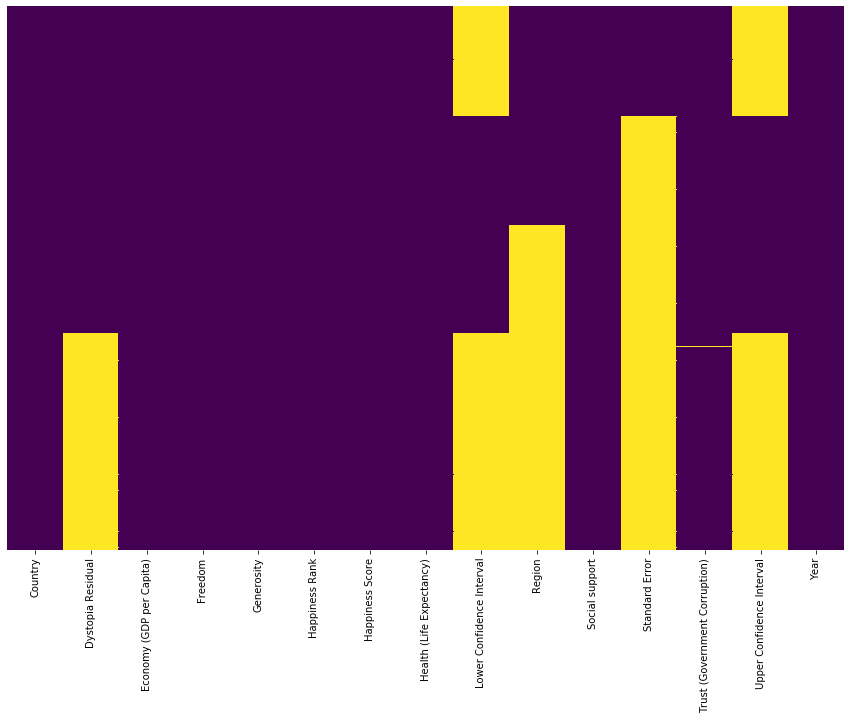

In [152]:
# HEATMAP OF NAN VALUES

plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the heatmap of NaN values:
- 'Standard Error', 'Upper and Lower Confidence Intervals' and 'Dystopia Residual' are non used for our data analysis. They will be dropped.

In [153]:
# DROPPING UNUSED FEATURES

df = df.drop(['Upper Confidence Interval', 'Lower Confidence Interval', 'Standard Error', 'Dystopia Residual'], axis=1)

In [154]:
df.head()

,Country,Economy (GDP per Capita),Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Social support,Trust (Government Corruption),Year
0,Switzerland,1.39651,0.66557,0.29678,1,7.587,0.94143,Western Europe,1.34951,0.41978,2015
1,Iceland,1.30232,0.62877,0.43630,2,7.561,0.94784,Western Europe,1.40223,0.14145,2015
2,Denmark,1.32548,0.64938,0.34139,3,7.527,0.87464,Western Europe,1.36058,0.48357,2015
3,Norway,1.45900,0.66973,0.34699,4,7.522,0.88521,Western Europe,1.33095,0.36503,2015
4,Canada,1.32629,0.63297,0.45811,5,7.427,0.90563,North America,1.32261,0.32957,2015


### 2. Filling the NaN attributes

#### 'Region'

Regions are already defined in our database (2015 & 2016), we just need to fill the NaN Values, based on the country name, the corresponding area.

In [155]:
# DICTIONNARY OF REGIONS AND CORRESPONDING COUNTRIES

region_list = list(df['Region'].unique())
dict_region_countries = {}

for region in region_list:
    countries_from_region_list = list(df[df['Region'] == region]['Country'].unique())
    dict_region_countries[region] = countries_from_region_list
    
print("List of regions and countries: {}".format(dict_region_countries))

List of regions and countries: {'Western Europe': ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'Austria', 'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Germany', 'France', 'Spain', 'Malta', 'Italy', 'North Cyprus', 'Cyprus', 'Portugal', 'Greece'], 'North America': ['Canada', 'United States'], 'Australia and New Zealand': ['New Zealand', 'Australia'], 'Middle East and Northern Africa': ['Israel', 'United Arab Emirates', 'Oman', 'Qatar', 'Saudi Arabia', 'Kuwait', 'Bahrain', 'Libya', 'Algeria', 'Turkey', 'Jordan', 'Morocco', 'Lebanon', 'Tunisia', 'Palestinian Territories', 'Iran', 'Iraq', 'Egypt', 'Yemen', 'Syria'], 'Latin America and Caribbean': ['Costa Rica', 'Mexico', 'Brazil', 'Venezuela', 'Panama', 'Chile', 'Argentina', 'Uruguay', 'Colombia', 'Suriname', 'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Ecuador', 'Bolivia', 'Paraguay', 'Nicaragua', 'Peru', 'Jamaica', 'Dominican Republic', 'Honduras', 'Haiti', 'Puerto Rico', 'Belize'],

In [156]:
df['Region'].value_counts()

Sub-Saharan Africa                 78
Central and Eastern Europe         58
Latin America and Caribbean        46
Western Europe                     42
Middle East and Northern Africa    39
Southeastern Asia                  18
Southern Asia                      14
Eastern Asia                       12
North America                       4
Australia and New Zealand           4
Name: Region, dtype: int64

In [157]:
def fillRegionForCountry(country):
    '''
    This function fills the region for the specified country.
    '''
    try:
        for region in dict_region_countries:
            if country in dict_region_countries[region]:
                df.loc[df['Country'] == country, ['Region']] = region
    except:
        print("Error with {}".format(country))

In [158]:
# FILLING THE REGION ATTRIBUTE

for country in list(df['Country'].unique()):
    fillRegionForCountry(country)
    
if len(df[df['Region'].isnull()]) > 0:
    print("Some countries do not have a region.")

Some countries do not have a region.


In [159]:
df[df['Region'].isnull()]['Country']

347    Taiwan Province of China
385     Hong Kong S.A.R., China
507           Trinidad & Tobago
527             Northern Cyprus
664           Trinidad & Tobago
689             Northern Cyprus
709             North Macedonia
745                      Gambia
Name: Country, dtype: object

In [160]:
# FILLING LAST MISSING NAN VALUES

df.loc[df['Country'] == "Taiwan Province of China", ['Region']] = 'Eastern Asia'
df.loc[df['Country'] == "Hong Kong S.A.R., China", ['Region']] = 'Eastern Asia'
df.loc[df['Country'] == "Trinidad & Tobago", ['Region']] = 'Latin America and Caribbean'
df.loc[df['Country'] == "Northern Cyprus", ['Region']] = 'Western Europe'
df.loc[df['Country'] == "North Macedonia", ['Region']] = 'Central and Eastern Europe'
df.loc[df['Country'] == "Gambia", ['Region']] = 'Sub-Saharan Africa'

#### 'Trust (Government Corruption)'

Some values are missing.

In [161]:
# NaN values of 'Trust (Government Corruption)'
df[df['Trust (Government Corruption)'].isnull()]

,Country,Economy (GDP per Capita),Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Social support,Trust (Government Corruption),Year
489,United Arab Emirates,2.096,0.284,0.186,20,6.774,0.67,Middle East and Northern Africa,0.776,NaN,2018


In [162]:
df[df['Country'] == 'United Arab Emirates']

,Country,Economy (GDP per Capita),Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Social support,Trust (Government Corruption),Year
19,United Arab Emirates,1.427270,0.641570,0.264280,20,6.901,0.809250,Middle East and Northern Africa,1.12575,0.38583,2015
185,United Arab Emirates,1.573520,0.562150,0.265910,28,6.573,0.729930,Middle East and Northern Africa,0.87114,0.35561,2016
335,United Arab Emirates,1.626343,0.608345,0.360942,21,6.648,0.726798,Middle East and Northern Africa,1.26641,0.32449,2017
489,United Arab Emirates,2.096000,0.284000,0.186000,20,6.774,0.670000,Middle East and Northern Africa,0.77600,NaN,2018
646,United Arab Emirates,1.503000,0.598000,0.262000,21,6.825,0.825000,Middle East and Northern Africa,1.31000,0.18200,2019


The mean from the different years will be used to fill the NaN value.

In [163]:
df.loc[489, 'Trust (Government Corruption)'] = df[df['Country'] == 'United Arab Emirates']['Trust (Government Corruption)'].mean()

### 3. Features distribution and correlations

In [164]:
# VERIFYING IF NAN VALUES REMAIN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
Country                          782 non-null object
Economy (GDP per Capita)         782 non-null float64
Freedom                          782 non-null float64
Generosity                       782 non-null float64
Happiness Rank                   782 non-null int64
Happiness Score                  782 non-null float64
Health (Life Expectancy)         782 non-null float64
Region                           782 non-null object
Social support                   782 non-null float64
Trust (Government Corruption)    782 non-null float64
Year                             782 non-null int64
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


The dataframe df has no NaN values anymore.

In [165]:
df.describe()

,Economy (GDP per Capita),Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Social support,Trust (Government Corruption),Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.916047,0.411091,0.218576,78.698210,5.379018,0.612416,1.078392,0.125674,2016.993606
std,0.407340,0.152880,0.122321,45.182384,1.127456,0.248309,0.329548,0.105959,1.417364
min,0.000000,0.000000,0.000000,1.000000,2.693000,0.000000,0.000000,0.000000,2015.000000
25%,0.606500,0.309768,0.130000,40.000000,4.509750,0.440183,0.869363,0.054250,2016.000000
50%,0.982205,0.431000,0.201982,79.000000,5.322000,0.647310,1.124735,0.091033,2017.000000
75%,1.236187,0.531000,0.278832,118.000000,6.189500,0.808000,1.327250,0.156243,2018.000000
max,2.096000,0.724000,0.838075,158.000000,7.769000,1.141000,1.644000,0.551910,2019.000000


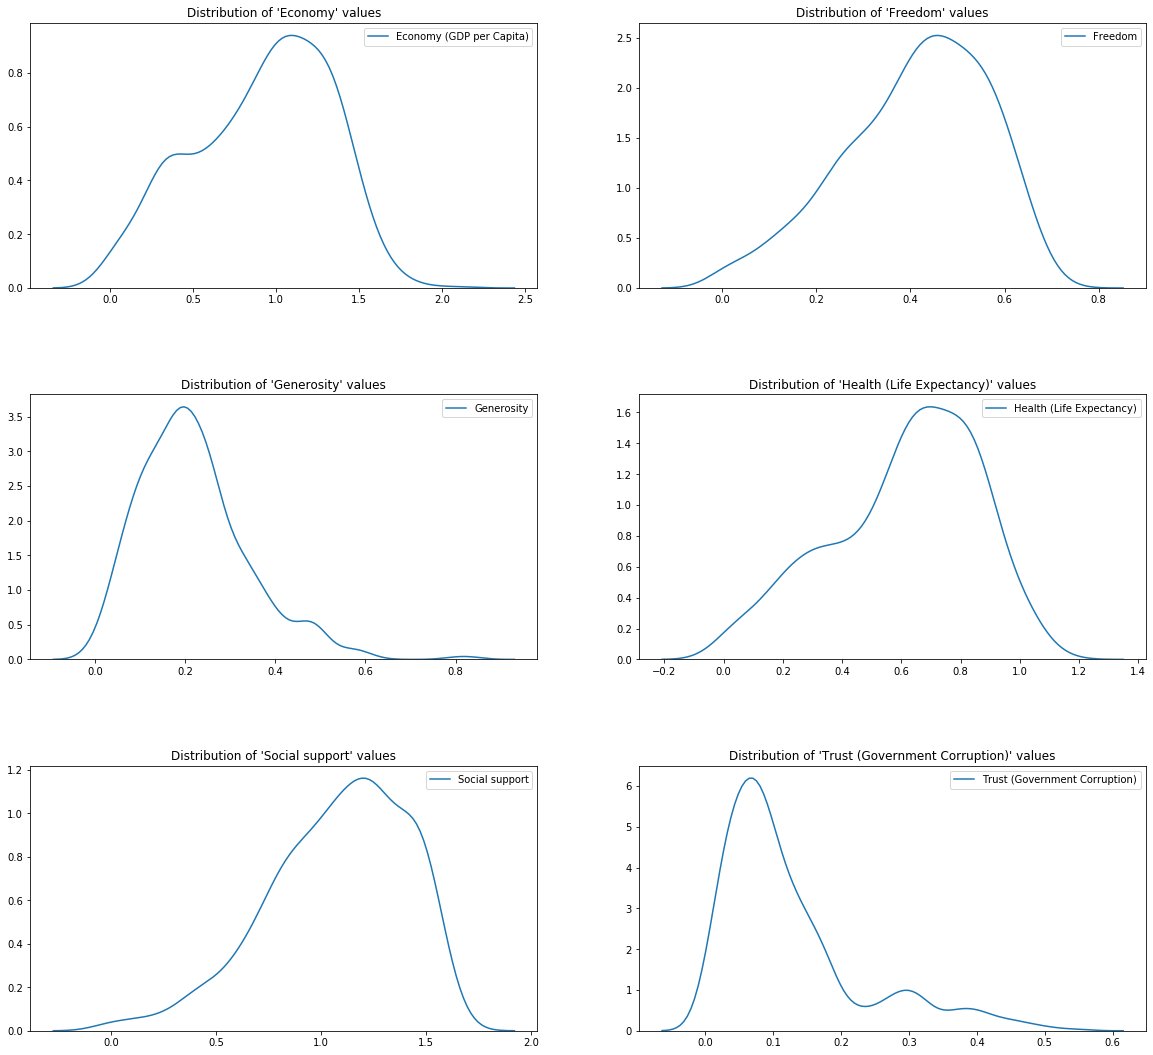

In [166]:
# DISTRIBUTION PLOTS

fig, axes = plt.subplots(3, 2, figsize=(20,16))

# Figure 0 - kdeplot 'Economy'
g0 = sns.kdeplot(df["Economy (GDP per Capita)"], ax=axes[0,0])
g0.set_title("Distribution of 'Economy' values")

# Figure 1 - kdeplot 'Freedom'
g1 = sns.kdeplot(df["Freedom"], ax=axes[0,1])
g1.set_title("Distribution of 'Freedom' values")

# Figure 2 - kdeplot 'Generosity'
g2 = sns.kdeplot(df["Generosity"], ax=axes[1,0])
g2.set_title("Distribution of 'Generosity' values")

# Figure 3 - kdeplot 'Health (Life Expectancy)'
g3 = sns.kdeplot(df["Health (Life Expectancy)"], ax=axes[1,1])
g3.set_title("Distribution of 'Health (Life Expectancy)' values")

# Figure 4 - kdeplot 'Social support'
g4 = sns.kdeplot(df["Social support"], ax=axes[2,0])
g4.set_title("Distribution of 'Social support' values")

# Figure 5 - kdeplot 'Trust (Government Corruption)'
g5 = sns.kdeplot(df["Trust (Government Corruption)"], ax=axes[2,1])
g5.set_title("Distribution of 'Trust (Government Corruption)' values")

plt.subplots_adjust(hspace = 0.4,top = 1.0)
plt.show()

From the description of numerical features and standard deviation curves, we notice that our variables do not show big outliers. There won't be anymore necessary filtering tasks.

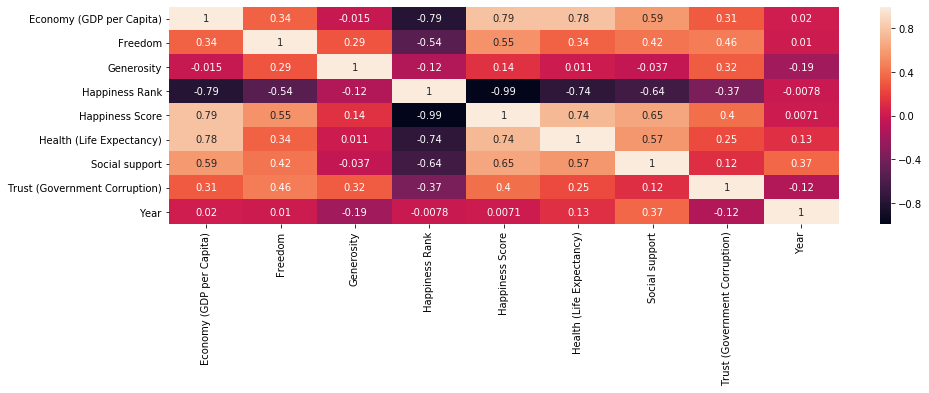

In [167]:
# HEATMAP CORRELATION BETWEEN FEATURES

plt.figure(figsize=(15,4))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

From the matrix, we can mainly understand:
- 'Trust' and 'Freedom' are connected. It seems that the more people are free, the more they trust the government as it gives them more rights to express themselves.
- 'Economy' and 'Life Expectancy' is highly correlated. In fact, the richer the country is, the more developed the health system is. Consequently, the 'Life Expectancy' increases. 
- 'Happiness score' is higly correlated to: 'Economy', 'Life Expectancy', 'social support', 'freedom',  and 'Trust' in the right order. The higher these values are, the higher the 'Happiness Score' will be.
However, 'Generosity' has almost no impact on 'Happiness Score'. Unfortunately, it demonstrates that the human being is very centered on himself, on fulfilling his proper needs without considering helping others.

### 4. Answering questions

#### 4.1 Was there any change in the top 10 countries in happiness from 2015 to 2019?

In [168]:
def getTopCountriesForCritPerYear(list_of_countries, variable):
    '''
    From a list of top countries considered for a feature, this function returns a DataFrame with the following structure:
    - index: the list of countries
    - columns: 2015, 2016, 2017, 2018, 2019, inc_dec_percent
    '''
    list_of_countries.append('Average Country')
    score_by_country = {}
    for country in list_of_countries:
        variable_score_country = []
        for year in years:
            if country != 'Average Country':
                variable_score_country.append(top_countries[variable + '_' + str(year)][country])
            else:
                variable_score_country.append(df[df['Year'] == year][crit].median())
        score_by_country[country] = variable_score_country

    # DATAFRAME WITH COUNTRIES AS INDEX
    df_top_countries_in_variable = pd.DataFrame.from_dict(score_by_country, orient='index', columns=['2015', '2016', '2017', '2018', '2019'])
    
    # PERCENTAGE INCREASE / DECREASE OF FEATURE BETWEEN 2015 AND 2019
    df_top_countries_in_variable['inc_dec_percent'] = round(100*(df_top_countries_in_variable['2019'] - df_top_countries_in_variable['2015'])/df_top_countries_in_variable['2015'],2)

    return df_top_countries_in_variable

In [169]:
# countries sorted out by their top score in the different criteria and per year

top_countries = {}

years = [2015, 2016, 2017, 2018, 2019]
criteria = ['Happiness Score', 'Economy (GDP per Capita)', 'Freedom',
            'Generosity', 'Health (Life Expectancy)', 
            'Social support', "Trust (Government Corruption)"]

for crit in criteria:
    for year in years:
        top_countries[crit + '_' + str(year)] = df[df['Year'] == year].set_index('Country')[crit].sort_values(ascending=False)

In [170]:
for year in years:
    print("top 10 Countries in happiness in {}: {}\n".format(year, list(top_countries['Happiness Score' + '_' + str(year)].index[:10])))

top 10 Countries in happiness in 2015: ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia']

top 10 Countries in happiness in 2016: ['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand', 'Australia', 'Sweden']

top 10 Countries in happiness in 2017: ['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia']

top 10 Countries in happiness in 2018: ['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia']

top 10 Countries in happiness in 2019: ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria']



Australia left the top 10 countries in 2019 and was replaced by Austria. Otherwise, the countries remain the same ones. Let's then consider the top 9 countries evolution from 2015 as they remain in the top 10 in 2019.

There is no big change in the list of top 10 countries from 2015 to 2019.

In [211]:
# FOR COUNTRIES FROM 2015 EXCEPT 'AUSTRALIA' (NOT ANYMORE IN TOP 10 IN 2019)
countries_top10_considered_happiness = list(top_countries['Happiness Score_2015'].index[:10])
countries_top10_considered_happiness.remove('Australia')

# GET TOP 9 COUNTRIES IN SCORE AND THEIR CORRESPONDING DATAFRAMES IN THE DIFFERENT CRITERIA
dict_of_df = {}
dict_of_df['stacked_score'] = 0
for crit in criteria:
    df_top9 = getTopCountriesForCritPerYear(countries_top10_considered_happiness,crit)
    dict_of_df[crit] = df_top9
    dict_of_df['stacked_score'] += df_top9

dict_of_df

{'stacked_score':                       2015      2016       2017     2018    2019  \
 Switzerland      12.656580  12.32303  12.711650  12.6560  12.688   
 Iceland          12.419910  12.17102  12.684989  12.5640  12.587   
 Denmark          12.562040  12.31221  12.730127  12.7390  12.806   
 Norway           12.578910  12.33093  12.797052  12.8050  12.867   
 Canada           12.402180  12.10318  12.445123  12.3510  12.364   
 Finland          12.192540  12.00053  12.508021  12.6790  12.824   
 Netherlands      12.290450  11.97065  12.459116  12.4340  12.582   
 Sweden           12.356510  12.03505  12.470147  12.4100  12.440   
 New Zealand      12.307830  12.19292  12.581545  12.4920  12.488   
 Average Country   8.627825   8.50520   8.962377   8.9695   9.080   
 
                  inc_dec_percent  
 Switzerland               -16.35  
 Iceland                   -12.31  
 Denmark                   -15.43  
 Norway                     -1.03  
 Canada                    -22.64  
 Finla

In [212]:
# FOR COUNTRIES CONSIDERED IN TOP 9 GETTING RANK IN THE DIFFERENT FEATURES
dict_rank_countries = {}

#FOR COUNTRIES CONSIDERED
for country_happiness in countries_top10_considered_happiness:
    rank_list_country = []
    
    # GET RANK PER FEATURE
    for crit in criteria:
        for index, country in enumerate(top_countries[crit + "_2019"].index):
            if country == country_happiness:
                rank = index + 1
                rank_list_country.append(rank) 
                #print("[{}] Country: {}, rank: {}/{}".format(crit,country_happiness,rank,len(top_countries[crit + "_2019"].index)))
    dict_rank_countries[country_happiness] = rank_list_country


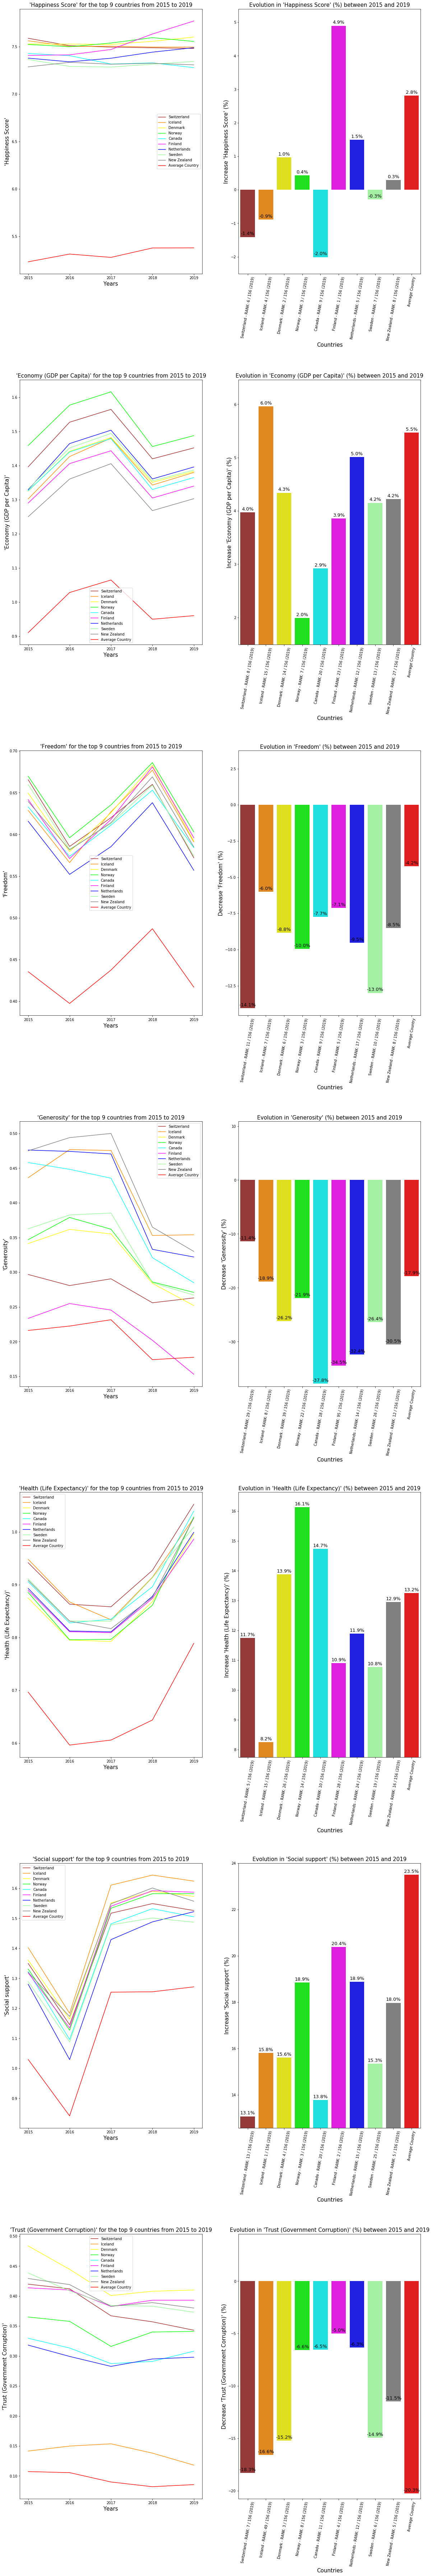

In [332]:
# PLOTTING THE TOP 9 COUNTRIES EVOLUTION FROM 2015 TO 2019 IN THE DIFFERENT CRITERIA


from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(7, 2, figsize=(20,110))

colors = ['brown', 'darkorange', 'yellow', 'lime', 'cyan', 'magenta',
            'blue', 'palegreen', 'grey', 'red']

for ax_index, crit in enumerate(criteria):
    if criteria != 'Happiness Score':
        # Figure 0 - curves top 9 countries in feature between 2015 / 2019
        for i, country in enumerate(dict_of_df[crit].index):
            ax[ax_index,0].plot(years, dict_of_df[crit].loc[country, ['2015', '2016','2017','2018','2019']].to_list(), label = country, color=colors[i])
            ax[ax_index,0].xaxis.set_major_locator(MaxNLocator(integer=True))
            ax[ax_index,0].set_xlabel('Years', fontsize=15)
            ax[ax_index,0].set_ylabel("'" + crit + "'", fontsize=15)
            ax[ax_index,0].set_title("'" + crit + "' for the top 9 countries from 2015 to 2019", fontsize=15)
            ax[ax_index,0].legend()

        # Figure 1 - barplot top 9 countries increase/decrease in feature between 2015 / 2019
        g1 = sns.barplot(y=dict_of_df[crit]['inc_dec_percent'], x=dict_of_df[crit].index, palette=colors, ax=ax[ax_index,1])
        g1.set_xlabel('Countries', fontsize = 15)

        g1.set_title("Evolution in '" + crit + "' (%) between 2015 and 2019", fontsize = 15)

        # CREATING LABELS WITH RANK OF THE COUNTRY IN THE FEATURE
        xticklabels = []
        for ele in dict_of_df[crit].index:
            text_label = ele 
            if ele != 'Average Country':
                text_label += " - RANK: " + str(dict_rank_countries[ele][ax_index]) + " / "+ str(len(top_countries[crit + "_2019"].index)) + " (2019)"
            xticklabels.append(text_label)

        g1.set_xticklabels(xticklabels,rotation=80)

        if dict_of_df[crit]['inc_dec_percent'].max() < 0:
            g1.set_ylabel("Decrease '" + crit +"' (%)", fontsize = 15)
            g1.set_ylim([dict_of_df[crit]['inc_dec_percent'].min()-0.5,abs(dict_of_df[crit]['inc_dec_percent'].max()+0.5)])
        else:
            g1.set_ylabel("Increase '" + crit +"' (%)", fontsize = 15)
            g1.set_ylim([dict_of_df[crit]['inc_dec_percent'].min()-0.5,dict_of_df[crit]['inc_dec_percent'].max()+0.5])           

        for p in g1.patches:
            g1.annotate(format(p.get_height(), '.1f')+'%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points',
                        color = 'black',
                        fontsize = 13)

plt.subplots_adjust(hspace = 0.4,top = 1.0)

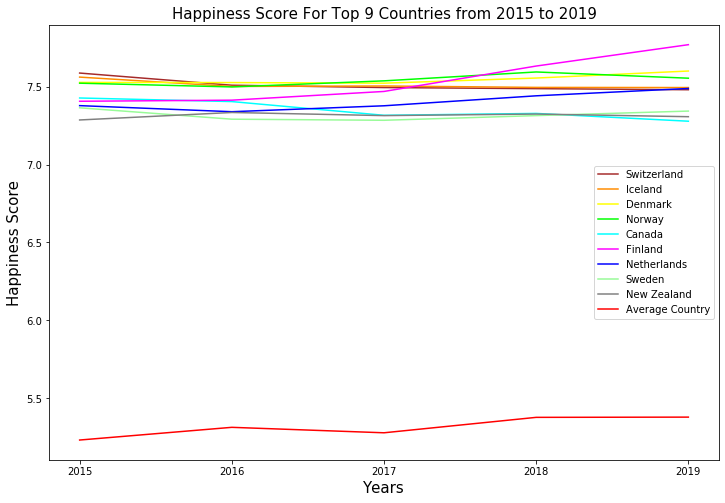

In [481]:
# PLOTTING RANKING OF COUNTRIES IN DIFFERENT CRITERIA IN 2019

from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1, 1, figsize=(12,8))

colors_countries = ['brown', 'darkorange', 'yellow', 'lime', 'cyan', 'magenta',
            'blue', 'palegreen', 'grey', 'red']

colors_bars = ['b', 'g', 'r', 'c', 'm', 'y',
            'w']



# Figure 0 - curves top 9 countries in 'Happiness Score' between 2015 / 2019
for i, country in enumerate(dict_of_df[crit].index):
    ax.plot(years, dict_of_df['Happiness Score'].loc[country, ['2015', '2016','2017','2018','2019']].to_list(), label = country, color=colors_countries[i])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel('Years', fontsize=15)
    ax.set_ylabel('Happiness Score', fontsize=15)
    ax.set_title("Happiness Score For Top 9 Countries from 2015 to 2019", fontsize=15)
    ax.legend()
    


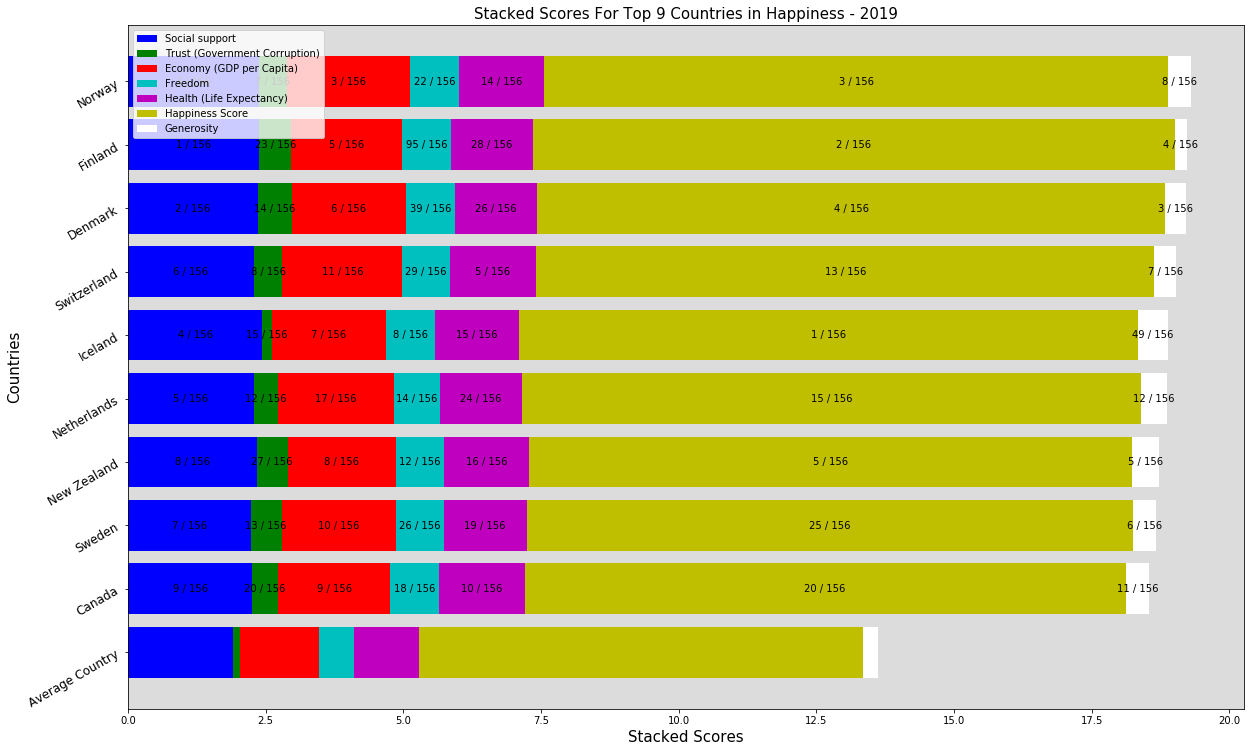

In [480]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

# Figure 1 - horizontal bars displaying stacked scores from all criteria per top countries - 2019
countries_sortedby_stacked_score = dict_of_df['stacked_score']['2019'].sort_values().index
criteria = ['Social support', "Trust (Government Corruption)", 'Economy (GDP per Capita)',
            'Freedom', 'Health (Life Expectancy)', 'Happiness Score','Generosity',]

left = 0

for index, crit in enumerate(criteria):
    ax.barh(dict_of_df[crit]['2019'].loc[countries_sortedby_stacked_score].index, 1.5*dict_of_df[crit]['2019'].loc[countries_sortedby_stacked_score].values, color=colors_bars[index], left=left)
    left += 1.5*dict_of_df[crit]['2019'].loc[countries_sortedby_stacked_score]

index_country = 0
index = 0
# ANNOTATE RANK OF THE COUNTRY FOR FEATURE
for i,p in enumerate(ax.patches):
    text_bar = ''
    if i % 10 == 0:
        index_country = 0
        if i != 0:
            index += 1

    if countries_sortedby_stacked_score[index_country] != 'Average Country':
        text_bar = str(dict_rank_countries[countries_sortedby_stacked_score[index_country]][index]) + " / "+ str(len(top_countries[crit + "_2019"].index))

    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            text_bar, 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize = 10,
              color='k')
    index_country += 1

ax.patch.set_facecolor('gainsboro')
ax.set_xlabel('Stacked Scores', fontsize=15)
ax.set_ylabel('Countries', fontsize=15)
ax.set_yticklabels(countries_sortedby_stacked_score, fontsize=12, rotation=30)
ax.set_title("Stacked Scores For Top 9 Countries in Happiness - 2019", fontsize=15)
ax.legend(criteria, loc='upper left')

plt.subplots_adjust(hspace = 0.2,top = 0.6)

In [442]:
dict_rank_countries[countries_sortedby_stacked_score[1]]

[9, 20, 9, 18, 10, 20, 11]

In [358]:
str(dict_rank_countries[countries_sortedby_stacked_score[0]])

'[]'

In [359]:
countries_sortedby_stacked_score

Index(['Average Country', 'Canada', 'Sweden', 'New Zealand', 'Netherlands',
       'Iceland', 'Switzerland', 'Denmark', 'Finland', 'Norway'],
      dtype='object')

- Finland shows the biggest growth from the top 9 countries, moving from rank 6 in 2015 to rank 1 in 2019 (+4.9% in score).


- The top 9 countries show the same evolution in 'Economy'.
Their 'Economy' is largely above the 'average country' of the ranking (they are in top 30 in 2019). 'Economy' seems to be a major feature in 'happiness score'. All of them show a growth (min: +2.0% / max: 6.0%)


- The top 9 countries show the same evolution in 'Freedom', with a negative value of growth (worst: -14.1%, best: -6%). However, their values remain higher than the 'average country'.
The top 9 countries are in top 20 from 'Freedom'.


- The top 9 countries show almost the same evolution in 'Generosity', with a negative value of growth (worst: -37.8%, best: -34.5%). The top 9 countries in happiness are becoming less and less generous to donations.
Countries are in the top 30 except Finland.
It is the country of the ranking showing a value below the average country in 2019, opposite to the fact that this country reached the first position in 2018 and kept it in 2019 in 'happiness score'.


- The top 9 countries show the same evolution in 'Life Expectancy', with a positive value of growthing (worst: 8.2%, best: 16,1%).
The top 9 countries from 'happiness score' seem to be also very high ranked in 'Life Expectancy'. This feature seems to contribute a lot to the 'happiness score'. They are all of them in top 30.


- The top 9 countries show the same evolution in 'Social support', with a positive value of growthing (worst: 13.1%, best: 20,4%).
They remain higer in values than 'average country'. They are in the top 30.


- The top 9 countries show the same evolution in 'Trust', with a negative value of growthing (worst: -18.3%, best: -5%).
They are all of them in top 15 except Iceland ranked 49.
The 'trust' values from these countries remain largely higher than the 'average country'. Finland has the smallest decrease.

#### 4.2 How are distributed between continents the different features?

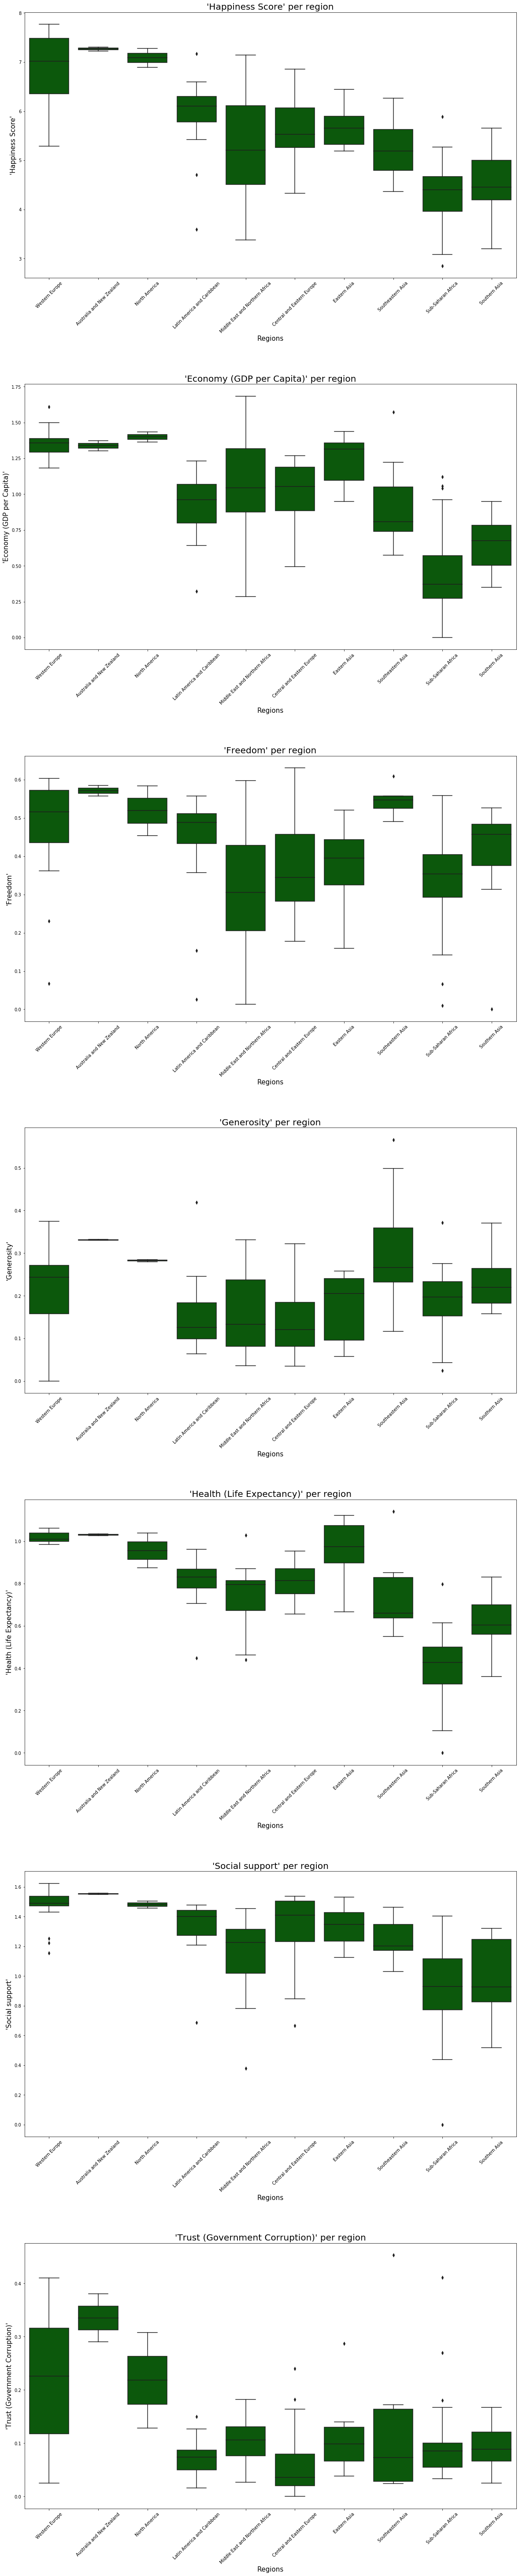

In [214]:
fig, axes = plt.subplots(len(criteria), 1, figsize=(20,90))

for ax_index, crit in enumerate(criteria):
    
    # Figure i - feature per 'Region'
    g = sns.boxplot(x='Region', y=crit,
                  data=df[df['Year'] == 2019],
                 color='darkgreen', ax=axes[ax_index])
    g.set_title("'" + crit +"' per region", fontsize=20)
    g.set_xlabel("Regions", fontsize=15)
    g.set_ylabel("'" + crit + "'", fontsize=15)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.4,top = 1.0)

- 'Western Europe' and 'Australia / New Zealand' are the happiest regions in the world.
- They are also the richest regions after 'North America'.
- They are also the most 'free', which confirms the famous statement the 'western free world'.
Most of the countries in the world do not show trust to their politics. A lot of them have dictatorships. 
- They are ranked after 'Southeastern Asia' as 'generous' (rank 8/10 in happiness).
- They are ranked after 'Eastern Asia' for 'Life Expectancy' (rank 7/10 in happiness)
- They are the best ones in 'Social support'.
- They are very high ranked in 'Trust'.


It is interesting to notice 'Southeastern Asia' is the most 'generous' region whereas it is ranked 8/10 in 'Economy'. It could be related to the fact according to their religions (for instance bouddhism), people should give a part of their income to their gods whatever they earn.

The 'Life Expectancy' in 'North America' is lower than 'Western Countries' or 'Australia / New Zealand'. It could be explained by the fact in the US the social care is private and costly. This is not accessible to everyone compared to Europe for instance. 'Eastern Asia' is reputed to care about the quality of their food. Besides, some countries are not completely industrialized compared to the 'Western World' (less polluted then).

Sub-Saharan Africa show problems in all criteria unfortunately, which means also it is the least happiest region. 